In [1]:
# If needed (usually not in school labs), uncomment to install:
# !pip install scikit-learn matplotlib pandas

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
X, y = load_iris(return_X_y=True)
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Class distribution:", np.unique(y, return_counts=True))


X shape: (150, 4)
y shape: (150,)
Class distribution: (array([0, 1, 2]), array([50, 50, 50]))


In [3]:
k_range = range(1, 32)  # 1..31 inclusive
mean_scores = []
std_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10)  # 10-fold CV (as required)
    mean_scores.append(scores.mean())
    std_scores.append(scores.std())

best_k = list(k_range)[int(np.argmax(mean_scores))]
best_acc = max(mean_scores)

print(f"Best k (by 10-fold CV mean accuracy) = {best_k}")
print(f"Best mean accuracy = {best_acc:.4f}")


Best k (by 10-fold CV mean accuracy) = 13
Best mean accuracy = 0.9800


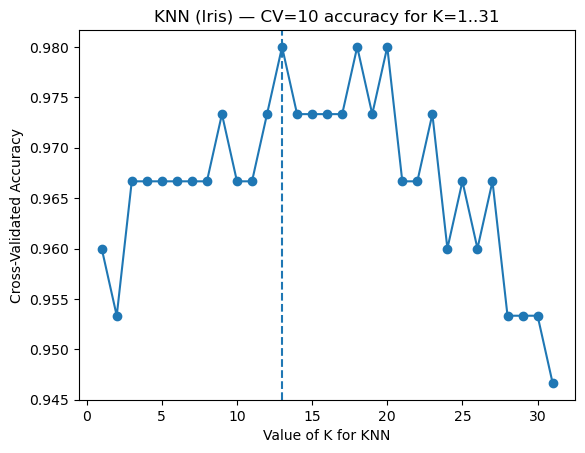

In [4]:
plt.figure()
plt.plot(list(k_range), mean_scores, marker='o')
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross-Validated Accuracy")
plt.title("KNN (Iris) — CV=10 accuracy for K=1..31")
plt.axvline(best_k, linestyle='--')   # marks the best k
plt.show()


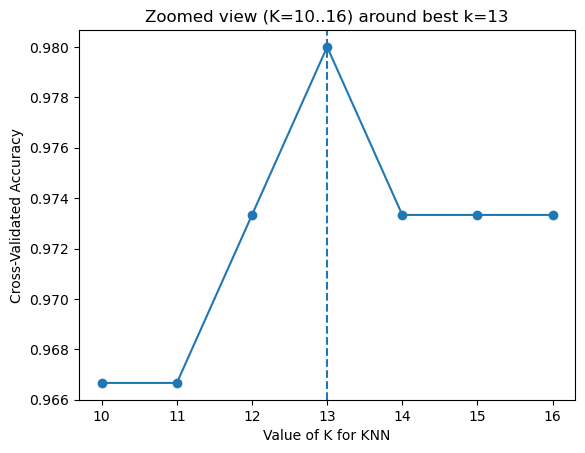

In [5]:
low = max(1, best_k - 3)
high = min(31, best_k + 3)
zoom_ks = list(range(low, high + 1))
zoom_scores = [mean_scores[k-1] for k in zoom_ks]

plt.figure()
plt.plot(zoom_ks, zoom_scores, marker='o')
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross-Validated Accuracy")
plt.title(f"Zoomed view (K={low}..{high}) around best k={best_k}")
plt.axvline(best_k, linestyle='--')
plt.show()


In [6]:
param_grid = {'n_neighbors': list(k_range)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10)
grid.fit(X, y)

print("GridSearchCV best params:", grid.best_params_)
print(f"GridSearchCV best CV accuracy: {grid.best_score_:.4f}")


GridSearchCV best params: {'n_neighbors': 13}
GridSearchCV best CV accuracy: 0.9800


In [7]:
df = pd.DataFrame({
    'k': list(k_range),
    'cv_mean_accuracy': mean_scores,
    'cv_std': std_scores,
})
df.head()
# Save alongside your notebook if you want:
# df.to_csv("knn_iris_cv_results.csv", index=False)


,k,cv_mean_accuracy,cv_std
0,1,0.960000,0.053333
1,2,0.953333,0.052068
2,3,0.966667,0.044721
3,4,0.966667,0.044721
4,5,0.966667,0.044721
